Importing the Libraries

##Internship Assignment

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense,Concatenate
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
#importing the Dataset
dataset = pd.read_csv('ratings.csv')

In [17]:
#Viewing the Dataset
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [18]:
#Shape of the Dataset
dataset.shape

(981756, 3)

In [19]:
#Values if null is there
dataset.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [20]:
#Splitting the Datset into the train and the test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [21]:
#shape of the training data
train.shape

(785404, 3)

In [22]:
#Shape of the test data
test.shape


(196352, 3)

In [23]:
#number of unique users
n_users=len(dataset.user_id.unique())
n_users

53424

In [24]:
#Number of unique books 
n_books = len(dataset.book_id.unique())
n_books

10000

In [25]:
# creating book embedding path
# Simple and the very first model
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/5
785404/785404 [==============================] - 128s 163us/step - loss: 13.6875
Epoch 2/5
785404/785404 [==============================] - 126s 160us/step - loss: 4.4878
Epoch 3/5
785404/785404 [==============================] - 120s 153us/step - loss: 1.8140
Epoch 4/5
785404/785404 [==============================] - 120s 153us/step - loss: 1.2088
Epoch 5/5
785404/785404 [==============================] - 118s 150us/step - loss: 0.9676


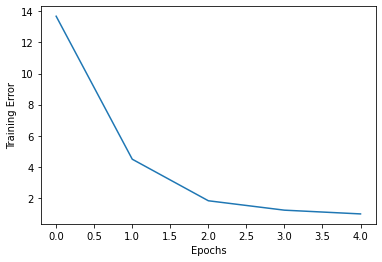

In [26]:
#keras model building and also saving the model as well and load the trained model if it is available 
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [27]:
#evaluating the model
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 4s 18us/step


1.1661777009500247

In [28]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc) 
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
785404/785404 [==============================] - 138s 175us/step - loss: 0.7957
Epoch 2/5
785404/785404 [==============================] - 133s 170us/step - loss: 0.6881
Epoch 3/5
785404/785404 [==============================] - 131s 167us/step - loss: 0.6576
Epoch 4/5
785404/785404 [==============================] - 128s 163us/step - loss: 0.6330
Epoch 5/5
785404/785404 [==============================] - 128s 163us/step - loss: 0.6123


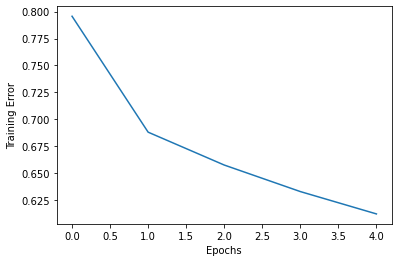

In [29]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [30]:
model2.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 4s 21us/step


0.7165143242132554

In [31]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

In [32]:
[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.8085823] 5
[3.7596152] 4
[3.3897288] 3
[4.1182995] 5
[3.3605125] 3
[3.8165498] 3
[3.6957014] 3
[4.689701] 4
[4.0905294] 3
[4.140786] 5


[None, None, None, None, None, None, None, None, None, None]

In [33]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [34]:
book_em_weights[:5]

array([[ 0.02726468, -0.01554756, -0.01019556, -0.04249803,  0.04590771],
       [-1.1146313 , -1.4735298 , -1.4491677 , -1.3323818 ,  1.3480543 ],
       [-1.169885  , -1.32242   , -1.4585836 , -1.4139044 ,  1.3557593 ],
       [-0.9461411 , -1.088379  , -1.1145636 , -0.88059   ,  0.7501741 ],
       [-1.450132  , -1.4097742 , -1.4455012 , -1.4905394 ,  1.4254112 ]],
      dtype=float32)

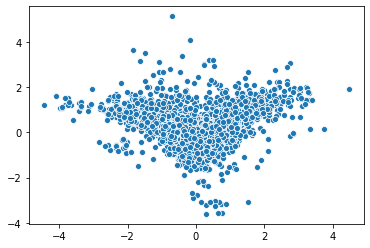

In [35]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [36]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0

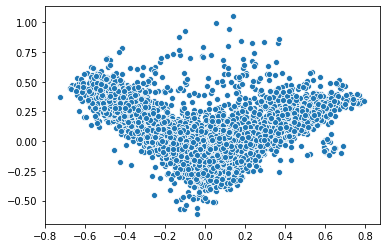

In [37]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.007s...
[t-SNE] Computed neighbors for 10001 samples in 0.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.028054
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.431259
[t-SNE] KL

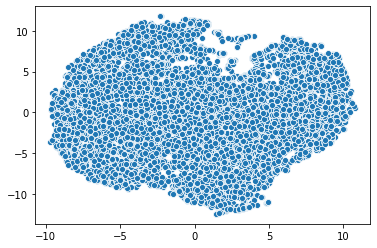

In [39]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])


In [40]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [41]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [42]:
predictions = model.predict([user, book_data])
print(predictions)

predictions = np.array([a[0] for a in predictions])

print(predictions)
recommended_book_ids = (-predictions).argsort()
print(recommended_book_ids)

[[2.6782982]
 [2.654019 ]
 [1.9406339]
 ...
 [2.9923985]
 [2.813777 ]
 [3.0791583]]
[2.6782982 2.654019  1.9406339 ... 2.9923985 2.813777  3.0791583]
[8258 7946 9208 ... 6999 5001 4590]


In [43]:
# Python program explaining 
# argpartition() function 
   
import numpy as geek 
  
# input array 
in_arr = geek.array([ 2, 0,  1, 5, 4, 1, 9]) 
print ("Input unsorted array : ", in_arr)  
  
out_arr = (-in_arr).argsort() 
print ("Output sorted array indices : ", out_arr) 
print("Output sorted array : ", in_arr[out_arr]) 

Input unsorted array :  [2 0 1 5 4 1 9]
Output sorted array indices :  [6 3 4 0 2 5 1]
Output sorted array :  [9 5 4 2 1 1 0]


In [44]:
# Python program explaining 
# argpartition() function 
  
import numpy as geek 
  
# input 2d array 
in_arr = geek.array([[ 2, 0, 1], [ 5, 4, 3]]) 
print ("Input array : ", in_arr)  
  
# output sorted array indices 
out_arr1 = geek.argsort(in_arr, kind ='mergesort', axis = 0) 
print ("Output sorteded array indices along axis 0: ", out_arr1) 
out_arr2 = geek.argsort(in_arr, kind ='heapsort', axis = 1) 
print ("Output sorteded array indices along axis 1: ", out_arr2) 

Input array :  [[2 0 1]
 [5 4 3]]
Output sorteded array indices along axis 0:  [[0 0 0]
 [1 1 1]]
Output sorteded array indices along axis 1:  [[1 2 0]
 [2 1 0]]


In [45]:
# print predicted scores
predictions[recommended_book_ids]

array([ 4.3326645,  4.200978 ,  4.195249 , ..., -1.648349 , -1.7297556,
       -2.097464 ], dtype=float32)

In [46]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [47]:
books[books['id'].isin(recommended_book_ids)][0:5]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [48]:
#Another Model

In [49]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
print(book_input)
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu',kernel_initializer='he_uniform')(conc)
fc2 = Dense(128, activation='relu')(fc1)
fc3 = Dense(32,activation='relu')(fc2)
out = Dense(1)(fc3)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Tensor("Book-Input_4:0", shape=(None, 1), dtype=float32)


In [50]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [66]:
model2.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 5s 27us/step


15.960557362713123

In [67]:
#basic idea 